# figure A1

In [1]:
import numpy as np
from scipy.integrate import odeint  
from operator import sub 
import controlpy   
import pickle
# import scipy.ndimage

from matplotlib import  rc    
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import rcParams
import matplotlib.ticker as ticker

import phasediagram as phd
import singlependulum as sp  
# import dynamicpendulums.figureparam as fp

# import phasediagram as phd 
# import figureparam as fp
# import singlependulum as sp 

from figure_settings import *   
import figure_functions as ff

In [2]:
# General Plotting Parameters  
fig_dim = (3.2, 2.5 )  
fig_name = 'figA1_heatmap'

In [3]:
def run_sim( x0 ,y0 ) : 
    t1 = x0[0]
    tau = x0[1]  
    
    # sim parameters 
    dt = 0.001; 
    tLast = 2. 
    n_steps = np.int(tLast/dt) 
    t = np.array([0,dt])  
    tInt = np.arange(0,tLast+dt, dt) ;
    
    Q = 1.
    R = 100. 

    # IC
    ## y0 is given
    un = 0
    time_sign = 1

    # initialize lists 
    y = []
    u = [] 
    
    for j in range(n_steps):
        y.append(y0)  
        u.append(un)     
        t_sim = tInt[j]
        if (t_sim> t1) & (t_sim< (t1+np.abs(tau) )):# & (tau>0):
            un = -3
#         elif (t_sim> t1) & (t_sim< (t1+np.abs(tau) )):# & (tau<0):
#             un = -3
        else: 
            un = 0 
        y1 = odeint(  sp.pendulum_ode, y0,  t, args=(un ,time_sign,)  )[1]     # ode solver 
        y1[0] = sp.wrap2periodic(y1[0]) 
         
        y0 = y1  
        
        if y1[0] > visible_x[0]:              
            break 
            
    # compute cost
    E = sp.compute_dE( np.array(y)[:,0], np.array(y)[:,1] )

    U = np.array(u) 
    
    e_error = np.abs(E[-1]) 
    if e_error < 0.3:
        e_error = 0 
        
    J = np.sum( E**2*Q+ U**2*R)  + 1e6*e_error
    t_list = tInt[:(j+1)] 
      
    return J, t_list, np.array(y), U  


def eval_sim( x0 ,y0 ) : 
    t1 = x0[0]
    tau = x0[1]  
    
    # sim parameters 
    dt = 0.001; 
    tLast = 2. 
    n_steps = np.int(tLast/dt) 
    t = np.array([0,dt])  
    tInt = np.arange(0,tLast+dt, dt) ;
    
    Q = 1.
    R = 100. 

    # IC
    ## y0 is given
    un = 0
    time_sign = 1

    # initialize lists 
    y = []
    u = [] 
    
    for j in range(n_steps):
        y.append(y0)  
        u.append(un)     
        t_sim = tInt[j]
        if (t_sim> t1) & (t_sim< (t1+np.abs(tau) )) & (tau>0):
            un = 3
        elif (t_sim> t1) & (t_sim< (t1+np.abs(tau) )) & (tau<0):
            un = -3
        else: 
            un = 0 
        y1 = odeint(  sp.pendulum_ode, y0,  t, args=(un ,time_sign,)  )[1]     # ode solver 
        y1[0] = sp.wrap2periodic(y1[0]) 
         
        y0 = y1  
        
        if y1[0] > visible_x[0]:              
            break 
            
    # compute cost
    E = sp.compute_dE( np.array(y)[:,0], np.array(y)[:,1] )

    U = np.array(u) 
    
    e_error = np.abs(E[-1]) 
    if e_error < 0.3:
        e_error = 0 
        
    J = np.sum( E**2*Q+ U**2*R)  + 1e6*e_error
    t_list = tInt[:(j+1)] 
      
    return J, t_list, np.array(y), U  
 

In [4]:
nt = 51
ntau = 51
 
t_range = np.linspace(0.1,0.8,nt) 
tau_range = np.linspace(0,1,ntau) 

T,TAU = np.meshgrid(t_range,tau_range)
 
th = -np.pi+0.3
dth = 3
J = np.zeros( (ntau,nt) ) 
y0 = np.array([th,dth])  

for i1, t1 in enumerate(t_range):
    for i2, tau in enumerate(tau_range): 
    
#         j_cost,__,__,__  = run_sim(y0, t1,tau) 
        j_cost,__,__,__  = run_sim( [t1, tau], y0 ) 
        J[i2,i1] = j_cost  

In [5]:
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b) 

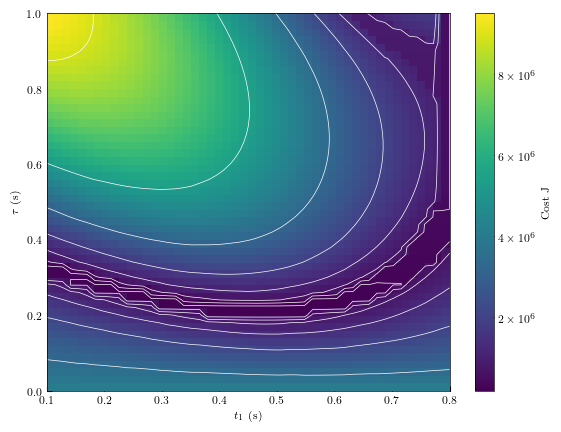

In [6]:
J_temp = J 
J_new = np.log(J)  

fig_dim = (6.5,5)

#--------------create real figure 
fig,ax = plt.subplots(1,1, figsize=fig_dim, dpi=100 )  

colmesh = ax.pcolormesh(T,TAU,  J_temp    )  
contour_plot = ax.contour(T,TAU, J_new  ,colors='w'  ,linewidths=0.5  ) 
  
ax2= fig.colorbar(colmesh , ax=ax, format=ticker.FuncFormatter(fmt) )

ax.set_xlabel(r'$t_1$ (s)')
ax.set_ylabel(r'$\tau$ (s)')  
ax2.set_label('Cost J')

# # # # # save fig  -----------------------------------------------------------------------
save_fig = False
# save_fig = True
if save_fig: 
    plt.savefig('./figs/' + fig_name + '.png',
            format='png', dpi=300,
            transparent=  True,             
            bbox_inches = 'tight', pad_inches = 0,
            )
#     plt.savefig('./figs/' + fig_name + '.svg',
#             format='svg',  transparent= True,
#             bbox_inches = 'tight', pad_inches = 0,
#             )   
    plt.savefig('./figs/' + fig_name + '.pdf',
            format='pdf',  transparent= True, 
            bbox_inches = 'tight', pad_inches = 0,
            )  
    plt.close()